# Emperical Modeling Application - Allometry

In [1]:
import numpy as np #used for arrays and numerical functions
import pandas as pd #used for reading a data file
import matplotlib.pyplot as plt #used for graphing
from io import StringIO #used to convert string to a dataframe
from scipy.optimize import curve_fit #used to find the fit parameters

In biological systems, emperical models are sometimes discovered that mathematically relate one biological (often anatomical) measurement with another. **Allometry** is the general study of emperical relationships in biological systems. Typically there are no theoretical models to predict such a relationship. Therefore, allometric relationships are **emperical models**.

This 2015 paper by Jean Gayon, [History of the Concept of Allometry](https://academic.oup.com/icb/article/40/5/748/157095), describes the history of the field of allometry and especially the work of pioneers Huxley and Teissier.

In this excellent summary of the field of allometry, [Allometry: The Study of Biological Scaling](https://www.nature.com/scitable/knowledge/library/allometry-the-study-of-biological-scaling-13228439/), the author states:

"Allometry, in its broadest sense, describes how the characteristics of living creatures change with size. The term originally referred to the scaling relationship between the size of a body part and the size of the body as a whole, as both grow during development. However, more recently the meaning of the term allometry has been modified and expanded to refer to biological scaling relationships in general, be it for morphological traits (e.g., the relationship between brain size and body size among adult humans), physiological traits (e.g., the relationship between metabolic rate and body size among mammal species) or ecological traits (e.g., the relationship between wing size and flight performance in birds). Indeed, allometric relationships can be described for almost any co-varying biological measurements, resulting in broad usage of the term. However, a unifying theme is that allometry describes how traits or processes scale with one another. The study of allometry concerns the functional mechanisms that generate these scaling relationship, how they impact ecology, and how they respond to and influence evolution."

## Example - Fiddler Crab

A [fiddler crab](https://scaquarium.org/our-animals/sand-fiddler-crab/) has one very large claw and one small claw. (The image is from [the SC Aquarium](https://scaquarium.org/our-animals/sand-fiddler-crab/).)

![](https://raw.githubusercontent.com/atitus/math-modeling/master/unit-02/02-07-allometry/fiddler-crab.jpg)

The file [fiddler-crab.txt](https://raw.githubusercontent.com/atitus/math-modeling/master/unit-02/02-07-allometry/fiddler-crab.txt) has data for the length of its claw in mm and diameter of the crab in mm. ([data source](https://www.futurelearn.com/courses/maths-power-laws/0/steps/12170)) I've pasted the data below so we can look at the graph. I use:

```python
plt.xlim(0,17)
plt.ylim(0,22)
```

to adjust the limits on the x and y axes so we can see the origin.

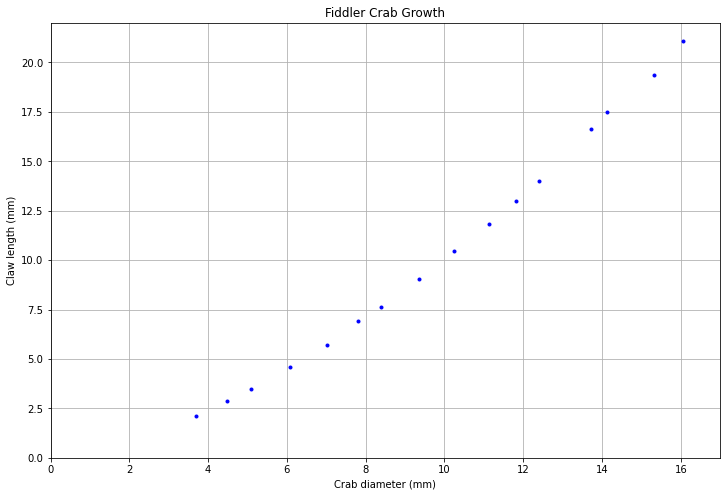

In [5]:
#define data
#The columns are: Crab Size (mm)	Claw Size (mm)
data = StringIO("""x	y
3.70	2.12
4.47	2.85
5.08	3.48
6.07	4.57
7.03	5.72
7.80	6.91
8.38	7.64
9.35	9.05
10.24	10.46
11.13	11.83
11.81	13.01
12.41	14.01
13.71	16.61
14.13	17.48
15.31	19.39
16.05	21.08
""")

# convert data to dataframe
df = pd.read_csv(data, sep ="\t")

# define arrays for the data
xdata = df['x']
ydata = df['y']

# create graph
fig1 = plt.figure(figsize=(12,8))

# plot data and model
plt.plot(xdata,ydata,'.b') # data
plt.grid()
plt.title("Fiddler Crab Growth")
plt.ylabel("Claw length (mm)")
plt.xlabel("Crab diameter (mm)")
plt.xlim(0,17)
plt.ylim(0,22)
plt.show()

### Exercise

The relationship is not linear. Which grows faster, the claw length or the crab's body?

### Exercise

**Find an emperical model that describes the length of the crab's claw as a function of the crab's diameter.** Note that the model must go through the point $(0,0)$ because when a crab is young, its diameter is nearly zero and its claw length is nearly zero. Then, as it grows, its diameter and its claw length increase.

Therefore, try a power function:

$$y = a x^n$$

## Log-Log Plot

For a power law (i.e. power model), it is common to plot $log(y)$ vs. $log(x)$. This type of graph is called a *log-log plot*.

Begin with the power function:

$$y=ax^n$$

Take the log of both sides. (You can use log base 10 or log base e. It doesn't matter.)

$$\log(y) = \log(ax^n)$$

Use log identities to write this:

$$\log(y) = \log(a) + n\log(x)$$

For clarity, let's write this as:

$$Y = A + nX$$

where $Y=\log(y)$ and $X=\log(x)$ and $A = \log(a)$. The fit parameters are $A$ and $n$. This is the equation of a straight line. The intercept is $A$ (which is $\log(a)$) and the slope is $n$.

Let's find the best-fit parameters $A$ and $n$ by fitting a linear function to $\log(y)$ vs $\log(x)$. When we do this, the parameter $a$ can thus be found using

$$a=e^{A}$$

To summarize, we have to:

1. graph $\log(y)$ vs. $\log(x)$.
2. do a linear fit to $\log(y)$ vs. $\log(x)$.
3. find $n$ using the slope.
4. find $a$ using $a=10^{A}$ where $A$ is the y-intercept from the linear fit.


### Creating a log-log plot

In the program below we use:

```python
xdata = np.log(df['x'])
ydata = np.log(df['y'])
```

to take the natural log (log base e) of the claw length and body diameter of the crab.

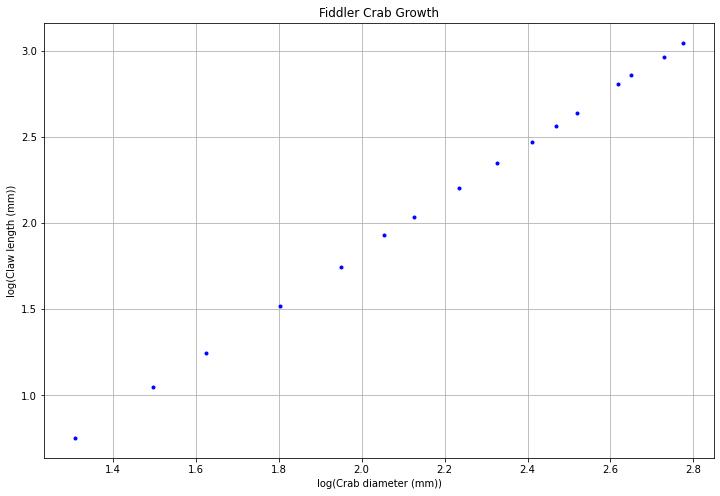

In [7]:
#define data
#The columns are: Crab Size (mm)	Claw Size (mm)
data = StringIO("""x	y
3.70	2.12
4.47	2.85
5.08	3.48
6.07	4.57
7.03	5.72
7.80	6.91
8.38	7.64
9.35	9.05
10.24	10.46
11.13	11.83
11.81	13.01
12.41	14.01
13.71	16.61
14.13	17.48
15.31	19.39
16.05	21.08
""")

# convert data to dataframe
df = pd.read_csv(data, sep ="\t")

# define arrays for the data
xdata = np.log(df['x'])
ydata = np.log(df['y'])

# create graph
fig1 = plt.figure(figsize=(12,8))

# plot data and model
plt.plot(xdata,ydata,'.b') # data
plt.grid()
plt.title("Fiddler Crab Growth")
plt.ylabel("log(Claw length (mm))")
plt.xlabel("log(Crab diameter (mm))")
plt.show()

### Doing a linear fit

We will do a linear fit to the function:
    
$$Y = A + nX$$

where $X$ is `xdata` and is the log of the Crab diameter and $Y$ is `ydata` and is the log of the claw length. The slope is $n$.

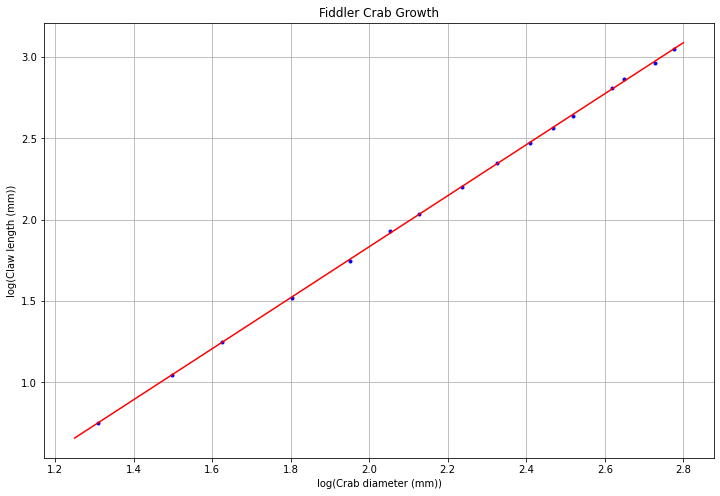

In [12]:
#define data
#The columns are: Crab Size (mm)	Claw Size (mm)
data = StringIO("""x	y
3.70	2.12
4.47	2.85
5.08	3.48
6.07	4.57
7.03	5.72
7.80	6.91
8.38	7.64
9.35	9.05
10.24	10.46
11.13	11.83
11.81	13.01
12.41	14.01
13.71	16.61
14.13	17.48
15.31	19.39
16.05	21.08
""")

# convert data to dataframe
df = pd.read_csv(data, sep ="\t")

# define arrays for the data
xdata = np.log(df['x'])
ydata = np.log(df['y'])

# define the model function; this function returns y(x) for a given x and fit parameters
model = lambda x,A,n: A+n*x

# Find best fit parameters
guess=[1,1] # this is the initial guess for the fit parameters
params, covariance = curve_fit(model, xdata, ydata, p0=guess)

# calculate points for the model
xmodel = np.linspace(1.25,2.8,100)
ymodel = model(xmodel,*params)

# create graph
fig1 = plt.figure(figsize=(12,8))

# plot data and model
plt.plot(xdata,ydata,'.b') # data
plt.plot(xmodel,ymodel,'-r') # data
plt.grid()
plt.title("Fiddler Crab Growth")
plt.ylabel("log(Claw length (mm))")
plt.xlabel("log(Crab diameter (mm))")
plt.show()

### Exercise

1. Print the fit parameters for the linear fit of the log-log plot.
2. What is $n$?
3. What is $A$ (which is the $\log(a)$.?
4. What is the parameter $a$ in the power law $y=ax^n$?
5. Compare the values of $n$ and $a$ to what you found in the first part of this notebook by fitting a function directly to the power law.
5. Which grows faster, the claw or the crab's body? 
6. If all I gave you was the value of $n$ and did not show you the curve, how can you know which body part grows faster?

### Exercise

Suppose you are walking on the beach and find a claw that was tragically separated from the crab. (Don't worry, they can [evidently grow another one on the other side after their next molt](https://en.wikipedia.org/wiki/Fiddler_crab).) The length of the claw is 4 mm. What was the width of the crab that lost the claw?

## Exercise - Trout

How does the mass of a trout scale with its length? Investigate it with data in the file [trout-length-width.txt](https://raw.githubusercontent.com/atitus/math-modeling/master/unit-02/02-07-allometry/trout-length-width.txt). ([data source](https://seattlecentral.edu/qelp/sets/023/023.html)) Determine an emperical model for the mass of a trout in grams as a function of its length in mm. Which grows at a faster rate, a trout's mass or its length?